In [ ]:
import pandas as pd
import numpy as np
# from wordcloud import  wordcloud
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/text.csv')
df.head()
df.info()


FileNotFoundError: [Errno 2] No such file or directory: '/content/text.csv'

In [ ]:
print(f'The Shape Of Data in sheet 1 Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
text,0
label,0


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
df.tail()

,Text,Label
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3
416808,i think that after i had spent some time inves...,5


In [ ]:
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

In [ ]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


<ipython-input-15-8d768f795dbc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


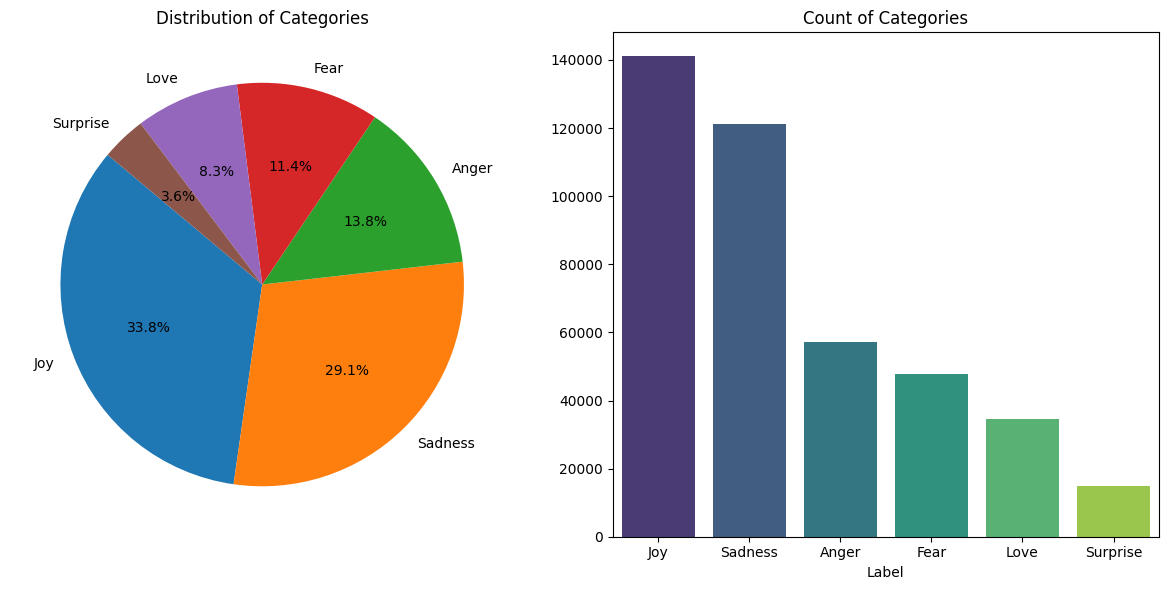

In [ ]:
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# ... rest of your code ...

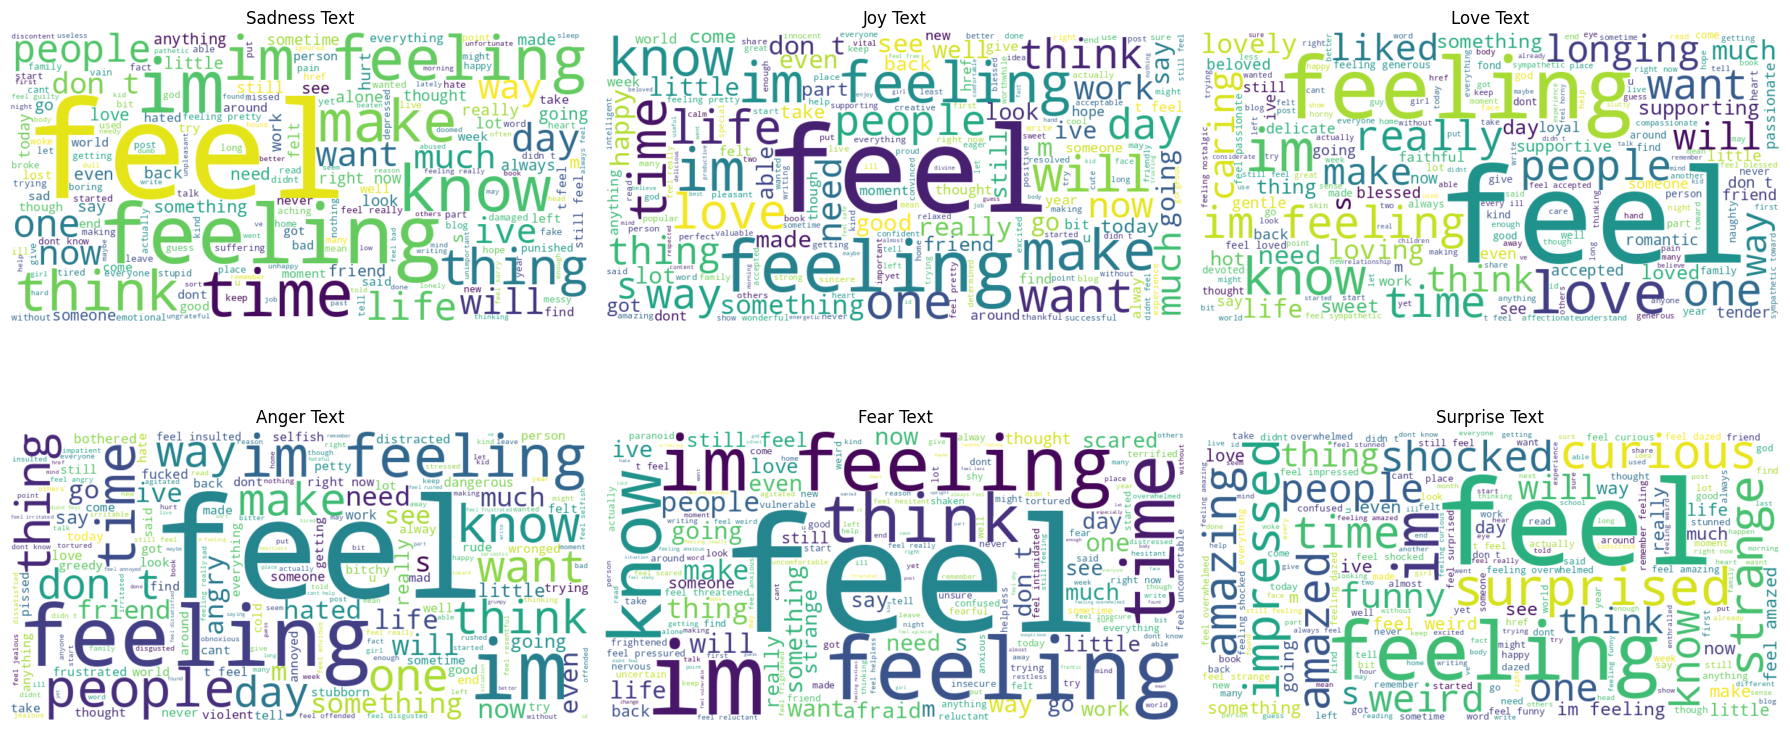

In [ ]:
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

In [ ]:
df.head()


,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


###as we need to clean the text like removing urls

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (uncomment the following line if not already downloaded)?
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
url_pattern = r'http\S+'
remaining_urls = df['Text'].str.contains(url_pattern, regex=True).sum()

print(f"Number of rows with remaining URLs: {remaining_urls}")

Number of rows with remaining URLs: 150


In [ ]:
# Step 1: Remove URLs
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [ ]:
# # Step 1: Remove URLs
# df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)
# # print(df.head())

In [ ]:
# Step 2: Remove special characters and punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [ ]:
# Step 3: Remove extra whitespaces
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [ ]:
# Step : 4 Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

# Head
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# prompt: how do i check the numeric characters are removed or not as in the above cell

# Check if any numeric characters remain
remaining_numbers = df['Text'].str.contains(r'\d+', regex=True).sum()

print(f"Number of rows with remaining numbers: {remaining_numbers}")


Number of rows with remaining numbers: 0


In [ ]:
# Step 6: Lowercasing
df['Text'] = df['Text'].str.lower()

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [ ]:
# Step 8: Remove stop words
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Display the first few rows of the DataFrame to verify the changes
df.head()


,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [ ]:
# Step : 9 Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [ ]:
X = df['Text']
y = df['Label']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (333447,)
X_test shape: (83362,)
y_train shape: (333447,)
y_test shape: (83362,)


In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [ ]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   16 30399    69 ...     0     0     0]
 [  268     5   723 ...     0     0     0]
 [    1    44   721 ...     0     0     0]
 ...
 [    1   591     0 ...     0     0     0]
 [    4    15   473 ...     0     0     0]
 [    1   147  1739 ...     0     0     0]]

X_test_padded:
[[  120    39   169 ...     0     0     0]
 [ 3033 14468   785 ...     0     0     0]
 [  188   303    48 ...     0     0     0]
 ...
 [  841   271  1955 ...     0     0     0]
 [ 1907  7254   634 ...     0     0     0]
 [   82     1   400 ...     0     0     0]]


In [ ]:
input_Size = np.max(X_train_padded) + 1
input_Size

50000

####I am Using BiDirectional GRU Here To Get Better Performence.Bidirectional Gated Recurrent Units (GRUs) are essential in natural language processing and sequence modeling tasks due to their ability to capture bidirectional dependencies in sequential data. Unlike traditional unidirectional models, which only process data in one direction (either forward or backward), bidirectional GRUs process input sequences in both directions simultaneously. This allows them to incorporate information from past and future context, enabling more comprehensive understanding and representation of the input sequence. By considering context from both directions, bidirectional GRUs excel in capturing long-range dependencies, especially in tasks where context plays a crucial role, such as sentiment analysis, machine translation, and named entity recognition. This bidirectional processing capability enhances model performance by capturing more nuanced relationships within the data, leading to improved accuracy and robustness in various sequence modeling tasks

In [ ]:
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # prompt: can u explain the above cell

# # This section defines a Sequential model, a linear stack of layers in Keras.

# model = Sequential()

# # Embedding Layer:
# # - Transforms words into dense vectors of fixed size (50 here).
# # - Maps each word in the input sequence to a corresponding vector representation.
# # - input_dim: Size of the vocabulary (maximum integer index + 1).
# # - output_dim: Dimensionality of the dense embeddings.
# # - input_length: Length of input sequences (maxlen).
# model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# # Dropout Layer:
# # - Randomly sets a fraction of input units to 0 at each update during training.
# # - Helps prevent overfitting by reducing interdependence between neurons.
# # - 0.5 means 50% of the input units will be dropped.
# model.add(Dropout(0.5))

# # Bidirectional GRU Layers:
# # - Processes sequences in both forward and backward directions.
# # - Captures contextual information from both past and future words.
# # - 120 and 64 are the number of units (hidden states) in each GRU layer.
# # - return_sequences=True indicates that the output will be a sequence of the same length as the input.
# model.add(Bidirectional(GRU(120, return_sequences=True)))
# model.add(Bidirectional(GRU(64, return_sequences=True)))

# # Batch Normalization Layer:
# # - Normalizes the activations of the previous layer at each batch.
# # - Improves stability and speed of training.
# model.add(BatchNormalization())

# # Bidirectional GRU Layer (Final):
# # - Processes the output of the previous layers in both directions.
# # - 64 units capture the final contextual representation.
# model.add(Bidirectional(GRU(64)))

# # Dense (Output) Layer:
# # - 6 units correspond to the 6 emotion categories (Sadness, Joy, Love, Anger, Fear, Surprise).
# # - 'softmax' activation function outputs probabilities for each category, summing to 1.
# model.add(Dense(6, activation='softmax'))

# # Compilation:
# # - Configures the learning process.
# # - 'adam' optimizer is a popular adaptive optimization algorithm.
# # - 'sparse_categorical_crossentropy' loss function is suitable for multi-class classification with integer labels.
# # - 'accuracy' metric measures the percentage of correctly classified instances.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Summary:
# # - Prints a summary of the model architecture, including layer types, output shapes, and number of parameters.
# model.summary()



In [ ]:
# history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

In [ ]:
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 58s 209ms/step - accuracy: 0.6264 - loss: 0.9616 - val_accuracy: 0.8899 - val_loss: 0.5980
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 78s 213ms/step - accuracy: 0.9330 - loss: 0.1290 - val_accuracy: 0.9299 - val_loss: 0.1259
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 84s 222ms/step - accuracy: 0.9413 - loss: 0.0993 - val_accuracy: 0.9375 - val_loss: 0.0999
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 83s 227ms/step - accuracy: 0.9424 - loss: 0.0925 - val_accuracy: 0.9336 - val_loss: 0.0948
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 222ms/step - accuracy: 0.9426 - loss: 0.0882 - val_accuracy: 0.9366 - val_loss: 0.0969


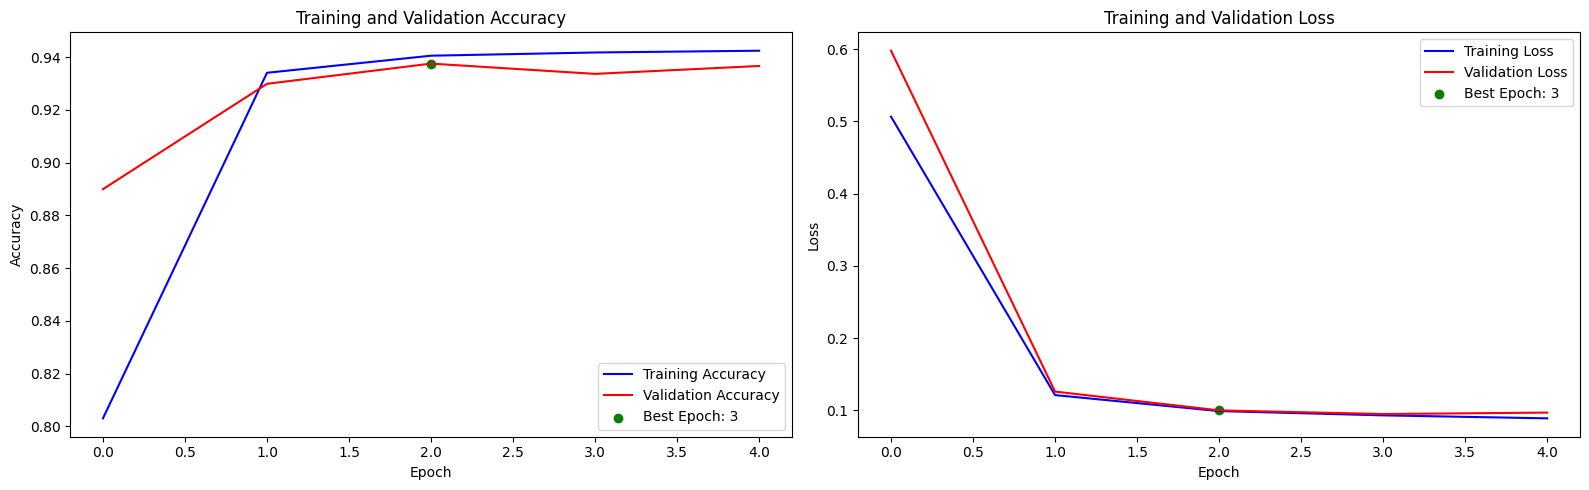

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate Test Data
model.evaluate(X_test_padded, y_test)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.9367 - loss: 0.0971


[0.09685253351926804, 0.9366137981414795]

In [ ]:
# prompt: how do i get the size of the X_test_padded

X_test_padded.shape


(83362, 79)

In [ ]:
# prompt: how do i print top 5 of these X_test_padded

print(X_test_padded[:1])


[[ 120   39  169   51    1  563   11 2297    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]]


In [ ]:
# Predictions On Test For Confustion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step


<Axes: >

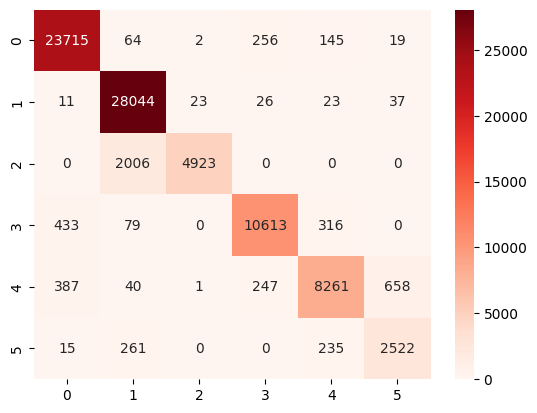

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

In [ ]:

# # Sentence to predict
# new_sentence = "This is an amazing day"

# # Preprocess the sentence
# new_sentence = new_sentence.lower()  # Lowercase
# new_sentence = re.sub(r'http\S+', '', new_sentence)  # Remove URLs
# new_sentence = re.sub(r'[^\w\s]', '', new_sentence)  # Remove special characters
# new_sentence = re.sub(r'\s+', ' ', new_sentence)  # Remove extra whitespaces
# new_sentence = re.sub(r'\d+', '', new_sentence)  # Remove numbers
# new_sentence = ' '.join([word for word in new_sentence.split() if word not in (stop)])  # Remove stop words
# new_sentence = re.sub(r'[^a-zA-Z\s]', '', new_sentence)  # Remove non-alphanumeric

# # Tokenize and pad the sentence
# new_sentence_sequence = tokenizer.texts_to_sequences([new_sentence])
# new_sentence_padded = pad_sequences(new_sentence_sequence, maxlen=maxlen, padding='post')

# # Make prediction
# prediction = model.predict(new_sentence_padded)
# predicted_class = np.argmax(prediction, axis=1)[0]

# # Map predicted class to emotion label
# emotion_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
# predicted_emotion = emotion_labels[predicted_class]

# print(f"Predicted Emotion: {predicted_emotion}")


In [ ]:
# prompt: save the model
model.save('model2.h5')

In [ ]:
# prompt: how do u check the model is savred in the drive

!ls /content/drive/MyDrive # replace with your drive directory if necessary


'Colab Notebooks'  'Mini Project'   model2.h5


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

In [ ]:
# # prompt: load the model from model.h5 and predict on test data new_sentence_padded

# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model('model2.h5')

# # Make prediction
# prediction = loaded_model.predict(new_sentence_padded)
# predicted_class = np.argmax(prediction, axis=1)[0]

# # Map predicted class to emotion label
# emotion_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
# predicted_emotion = emotion_labels[predicted_class]

# print(f"Predicted Emotion: {predicted_emotion}")



In [ ]:
# model.save('/content/drive/MyDrive/model2.h5') # Or any other path in your Drive

In [ ]:
# from tensorflow.keras.models import load_model
# model = load_model('/content/drive/MyDrive/model2.h5') # Or the path you saved it to

In [ ]:
import gradio as gr
import numpy as np
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming the necessary components like tokenizer, maxlen, stop words list, and model are defined elsewhere in your code.

def predict_emotion(text):
    # Preprocess the sentence
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join([word for word in text.split() if word not in stop])
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and pad the sentence
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=maxlen, padding='post')

    # Make prediction
    prediction = model.predict(text_padded)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map predicted class to emotion label
    emotion_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
    predicted_emotion = emotion_labels[predicted_class]

    return predicted_emotion

# Create Gradio interface
iface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=5, label="Enter your text:"),
    outputs=gr.Textbox(label="Predicted Emotion"),
    title="ANALYZING DEPRESSION AND ANXIETY TRENDS",
    description="Enter some text and the model will predict its emotion."
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8c12d6e20103743ce2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
